In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)

In [2]:
# Load NHANES for ML
fpath = "Data/NHANES_Diet_Diabetes_Risk.xls.csv"
df = pd.read_csv(fpath)
df = df.set_index("SEQN")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6643 entries, 73557 to 83729
Columns: 168 entries, WTDRD1 to Diabetes_Risk
dtypes: float64(166), int64(2)
memory usage: 8.6 MB


,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V,Diabetes_Risk
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,16888.32786,12930.89065,1,49.0,2.0,2.0,6.0,2.0,1.0,1.0,13.0,3.0,2.0,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1574.0,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,209.0,3.92,0.0,70.0,110.0,60.0,304.0,278.0,1398.0,430.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
73558,17932.14387,12684.14887,1,59.0,2.0,2.0,4.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5062.0,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,2584.0,20.94,0.0,1477.0,1488.0,0.0,145.0,12.0,0.0,899.0,...,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2
73559,59641.81293,39394.23671,1,49.0,2.0,2.0,18.0,6.0,1.0,1.0,13.0,1.0,1.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,88.0,8.87,0.0,616.0,655.0,21.0,449.0,35.0,515.0,300.0,...,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
73561,59052.35703,39004.89299,1,63.0,2.0,2.0,18.0,1.0,1.0,1.0,13.0,4.0,NaN,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,7.0,1421.0,55.24,178.20,87.78,12.3,55.36,4.479,26.216,1.263,41.0,53.17,0.0,738.0,863.0,0.0,1476.0,0.0,0.0,0.0,...,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,0
73562,49890.82866,0.00000,1,49.0,2.0,1.0,11.0,3.0,1.0,1.0,13.0,1.0,3.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,1785.0,55.11,189.59,81.75,22.6,93.92,22.155,40.013,23.550,534.0,12.30,0.0,272.0,355.0,172.0,776.0,300.0,2339.0,2101.0,...,2.0,NaN,2.0,NaN,2.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,0


In [11]:
# list of cols to drop

X = df.drop(columns = ['Diabetes_Risk'])
y = df['Diabetes_Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78727,70710.30601,46705.128430,1,59.0,2.0,2.0,1.0,7.0,1.0,1.0,13.0,4.0,NaN,3.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1339.0,50.73,211.40,77.68,15.8,34.75,11.780,10.515,8.776,63.0,2.54,0.0,246.0,294.0,164.0,509.0,7.0,303.0,827.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,1.0,5.0,2.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
82233,60907.62017,88806.191190,1,25.0,2.0,2.0,0.0,5.0,1.0,1.0,13.0,3.0,3.0,1.0,1.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,858.0,45.09,105.41,16.39,5.7,27.83,9.012,9.554,6.515,253.0,1.96,0.0,226.0,233.0,0.0,97.0,5.0,448.0,424.0,...,4.0,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,1.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,4.0,2.0,NaN,2.0
74032,46703.93997,173276.611500,1,2.0,2.0,2.0,3.0,1.0,1.0,1.0,13.0,4.0,NaN,3.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1356.0,59.90,167.90,115.17,5.2,50.45,23.208,15.741,4.577,166.0,1.83,0.0,249.0,266.0,39.0,181.0,16.0,1809.0,83.0,...,1.0,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79069,10390.35346,8097.175852,1,2.0,2.0,2.0,11.0,7.0,1.0,1.0,13.0,4.0,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,1797.0,98.61,204.13,62.15,25.1,71.02,13.122,24.368,25.394,243.0,10.95,0.0,456.0,532.0,265.0,751.0,67.0,4285.0,927.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77717,48746.26378,180853.851200,1,25.0,2.0,2.0,20.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,4299.0,138.95,559.97,299.94,27.8,174.33,65.027,59.996,27.510,276.0,15.81,0.0,606.0,737.0,18.0,1509.0,21.0,31209.0,928.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

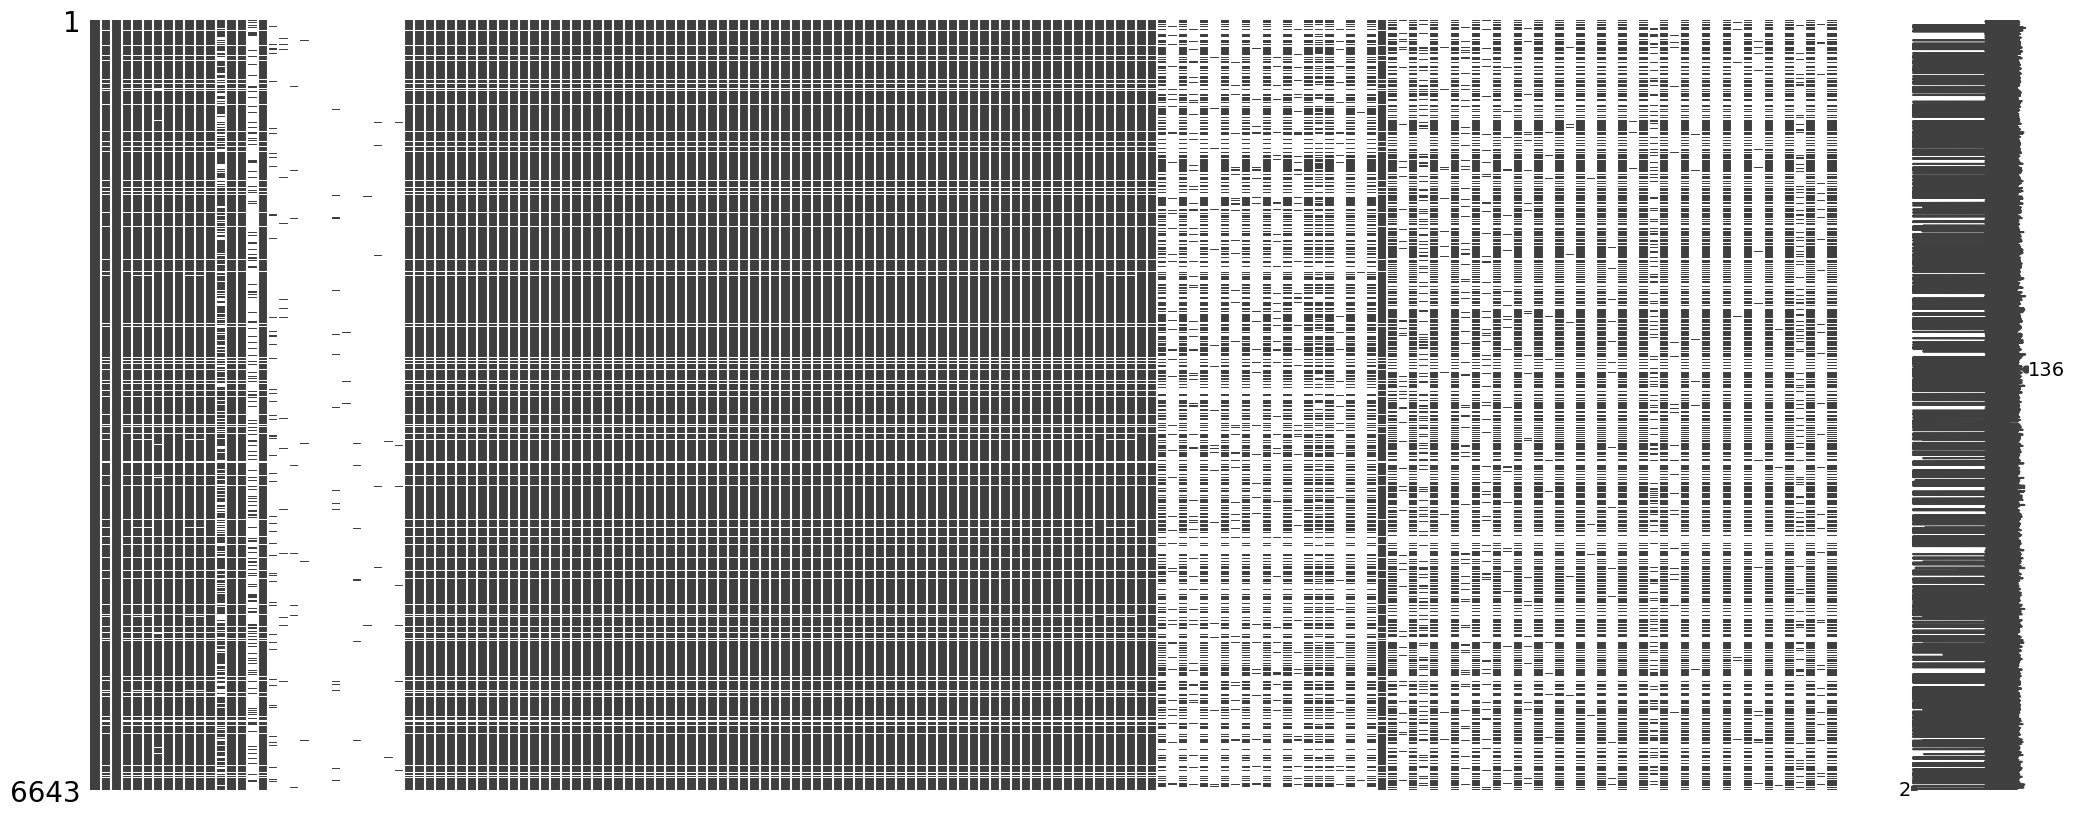

In [12]:
import missingno as msno
msno.matrix(X)

In [24]:
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple],
                                 verbose_feature_names_out=False)


Numeric Columns: Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=167)


In [25]:
#Create column transformer
col_transformer = ColumnTransformer([num_tuple],
                                    verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=167))],
                  verbose_feature_names_out=False)

In [27]:
# Fit on the X_train
col_transformer.fit(X_train)
# Transform X_train and X_test
X_train_tf = col_transformer.transform(X_train)
X_test_tf = col_transformer.transform(X_test)
X_train_tf.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,...,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78727,0.828246,0.121669,-0.295989,0.759244,0.0,0.338808,-1.340234,1.195759,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.165331,0.189828,-0.046713,-1.392493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929421,-0.758725,-0.672011,-0.332717,-0.434149,-0.060394,-0.974490,-0.868066,-0.995841,-0.768236,-0.944910,-0.784441,-0.182283,-0.397301,-0.527561,-0.157457,-0.349554,-0.191218,-0.523296,-0.174656,-0.295260,...,-0.097381,0.173753,-0.087421,0.049137,-0.027836,0.0,-0.473916,0.265908,-0.138889,-1.830599,2.224798,0.118509,-0.059742,0.329903,-0.012884,-3.540910,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,0.408678,-0.101500,0.203975,-0.030765,0.0
82233,0.579175,0.890047,-0.295989,-0.965540,0.0,0.338808,-1.429137,0.240609,-0.256418,-0.073655,0.079215,-0.035916,1.737711,-1.812684,-1.192806,0.433627,0.145392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.587796,-1.251760,-0.800935,-1.194710,-1.250417,-1.052084,-1.124673,-1.042537,-1.051694,-0.942262,-0.127315,-0.858855,-0.182283,-0.448869,-0.637360,-0.301731,-0.449779,-0.196408,-0.504781,-0.288864,1.562895,...,1.288762,0.173753,-0.087421,0.049137,-0.027836,0.0,-0.473916,0.265908,-0.138889,-1.830599,0.669048,0.118509,-0.059742,0.329903,-0.012884,0.282413,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,-2.446912,1.714198,0.203975,-0.030765,0.0
74032,0.218283,2.431698,-0.295989,-2.132305,0.0,0.338808,-1.162428,-1.669691,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.165331,0.189828,-0.046713,-1.392493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.587796,-0.741300,-0.462396,-0.686493,0.065147,-1.101178,-0.633755,-0.147745,-0.692104,-1.091427,-0.501687,-0.875534,-0.182283,-0.389566,-0.577960,-0.267422,-0.429345,-0.167867,-0.330998,-0.385502,-1.128112,...,-0.790452,0.173753,-0.087421,0.049137,-0.027836,0.0,0.777302,0.265908,-0.138889,0.546269,-0.108828,0.118509,-0.059742,0.329903,-0.012884,0.282413,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,0.408678,-0.101500,0.203975,-0.030765,0.0
79069,-0.704387,-0.582956,-0.295989,-2.132305,0.0,0.338808,-0.451206,1.195759,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.989007,0.189828,-0.046713,0.145392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.592262,-0.289266,0.422469,-0.391842,-0.640980,0.852746,-0.187328,-0.783478,-0.190701,0.510826,-0.170346,0.294560,-0.182283,0.144158,-0.099162,-0.068606,-0.290684,-0.035542,-0.014842,-0.146317,1.192370,.

In [28]:
scaler = StandardScaler()
# Fit & transform data.
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [14]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate default KNN
knn = KNeighborsClassifier()



In [30]:
# make and fit a pipe

knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=167))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [31]:
# Custom Functions
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict



----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      4085
           1       0.49      0.04      0.08       437
           2       0.68      0.04      0.08       460

    accuracy                           0.82      4982
   macro avg       0.66      0.36      0.35      4982
weighted avg       0.78      0.82      0.75      4982



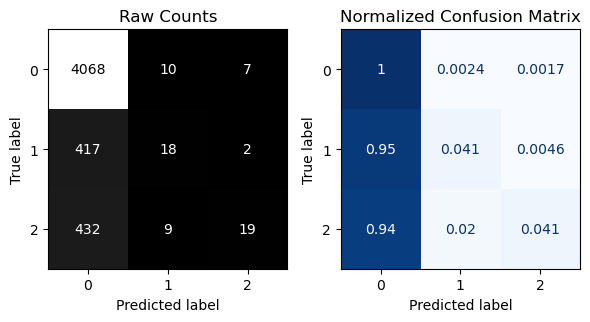


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1367
           1       0.25      0.03      0.05       150
           2       0.27      0.02      0.04       144

    accuracy                           0.82      1661
   macro avg       0.45      0.35      0.33      1661
weighted avg       0.73      0.82      0.75      1661



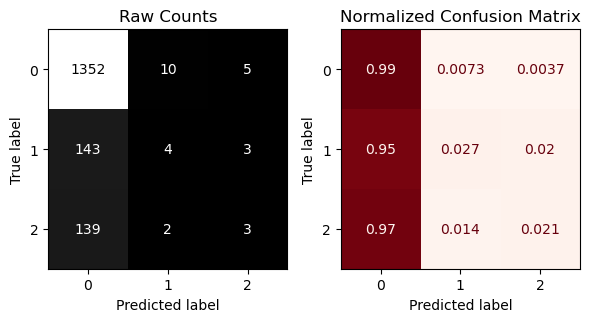

In [32]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)


In [33]:
%%time
# Record the time it takes to make predictions

preds = knn.predict(X_test_tf)

CPU times: total: 562 ms
Wall time: 103 ms


In [37]:
# Instantiate PCA to make 3 principal components
pca = PCA(n_components=.95)
# Create and define the principal components
PCA_X_train = pca.fit_transform(X_train_tf)
PCA_X_test = pca.transform(X_test_tf)
# Preview the results
PCA_X_train.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80,pca81,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94,pca95,pca96,pca97,pca98
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78727,-3.649680,0.764648,1.709007,-1.123493,-0.385363,-0.828005,-0.084729,-0.181392,0.786301,-0.028242,0.483072,-0.577797,-0.016673,0.296358,-0.245695,0.389954,0.265270,-0.383318,-0.360312,-0.102004,0.876861,0.060666,0.556837,-0.473227,0.121427,0.837177,0.140249,-0.355786,-0.110548,-0.054288,0.306467,-0.564210,0.494520,0.824716,-1.198694,-0.522387,0.200069,-0.201292,0.202897,-0.468026,-0.895188,0.025272,0.261670,0.373023,-0.017414,0.048258,-0.899927,0.770741,1.364004,0.942779,-1.194764,-0.284686,-1.325268,-1.206638,-1.305986,0.386308,0.879044,0.320764,-0.305092,-0.530911,0.018377,1.122998,-0.147931,0.332519,0.818502,-2.078847,0.459443,1.440232,-0.536239,0.147825,0.028557,-0.757080,0.267103,0.352954,0.054296,-0.432905,-0.521202,-0.026037,0.167211,-0.518424,0.610457,0.198634,0.093697,-0.127988,-0.491373,0.442518,0.074444,0.110804,-0.533148,0.415098,-0.064180,0.012142,0.278319,0.029929,0.193466,0.112053,-0.319073,0.175273,-0.181487
82233,-4.499968,2.256458,0.202801,-2.603137,0.878943,0.568911,-1.577361,-1.386312,-0.349421,-1.068728,0.165086,2.790230,-1.647374,0.682288,-0.307624,0.658101,0.331894,1.571941,-0.671523,1.124787,2.294435,-0.868414,-1.023780,0.398742,0.402738,0.871089,1.207087,1.268333,-0.748642,-0.705578,-1.580561,1.300234,1.197700,1.048102,-0.235937,-1.007016,-0.965441,0.529873,0.909837,-0.354006,1.424245,-0.128676,0.518295,-1.652049,0.347207,0.378123,0.302618,1.028287,-0.703712,-0.826548,-1.047954,0.131848,-0.789677,0.504123,-1.257322,0.863620,0.344138,-0.739061,-0.274077,1.726952,0.477055,1.062481,0.957928,-0.845496,1.770338,-0.774071,-1.336178,0.094392,1.230768,-0.663306,-0.412580,0.106383,0.193587,0.255120,-0.893460,0.207120,-0.335832,-0.802944,-0.300645,-0.201842,-0.434553,0.247906,0.074128,0.145929,-0.117604,0.089643,-0.527252,-0.263038,-0.003554,0.397013,0.243662,0.401354,0.202655,0.444708,-0.782406,0.010937,0.079925,0.128944,0.191770
74032,-3.733771,-1.710261,-0.506078,-1.630900,1.000118,-0.755961,0.428712,-1.465199,0.430562,1.163332,-0.181995,-0.152439,-0.099837,0.332131,0.461213,-0.011297,0.261248,0.168630,-0.250970,0.774875,0.272419,-0.613094,-0.730822,-0.089464,0.575228,-1.001766,0.367522,-0.089291,-0.285200,0.292518,0.009284,-0.028412,-1.268570,-0.089122,0.743117,-0.374725,0.678973,-0.059826,0.006722,-0.424081,-0.248553,-0.216375,-0.150103,-1.139156,1.223624,-0.496495,0.226410,0.069692,-0.604002,0.409108,-0.279646,-0.188078,-0.606560,-0.524039,0.947680,-0.262755,-0.325471,-0.479137,0.197324,0.585998,-0.294376,-0.304169,0.079570,-0.590416,-0.116039,-0.400827,0.441836,-0.092538,0.208473,0.204529,0.015197,0.007618,0.122733,-0.306977,0.258771,0.052687,-0.488753,0.012892,-0.295019,0.213713,0.096949,0.421228,0.378313,-0.049757,0.145764,0.231357,0.329754,0.172351,0.444590,0.188764,-0.193246,-0.193239,0.036772,-0.556546,-0.009050,-0.198828,0.207212,0.115774,0.084848
79069,-0.064294,0.613961,1.376443,1.926162,-1.452174,-0.440674,-0.373216,-0.123226,0.106464,-0.011144,0.235667,-0.314277,-0.113278,-0.534311,-0.409872,-0.208303,0.266033,-0.187316,-0.049353,-0.005145,-0.004253,0.188956,-0.108821,0.708138,0.216650,0.081670,0.152130,0.445704,0.013703,0.168780,-0.335006,-0.119654,-0.089915,0.070556,0.150356,0.230890,0.457179,0.114607,-0.764243,0.113429,-0.207924,-0.243218,-0.976036,-0.066683,0.353296,-0.936424,0.150284,-0.195649,-0.343544,0.5241

In [38]:
PCA_X_test.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80,pca81,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94,pca95,pca96,pca97,pca98
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
82685,-4.219341,4.380997,-3.244905,2.012116,3.482696,-2.680006,1.204486,-0.533142,0.939764,0.556415,3.499250,-0.533011,3.639971,2.561897,-0.982987,1.484913,-0.594197,-4.244224,-0.908630,-1.239109,-0.637990,-4.368897,0.124535,0.934241,-2.293886,0.608534,-3.836078,2.001472,1.424918,-0.118855,-3.496636,1.939913,-2.103579,-1.985545,-1.304505,-0.255839,-0.361165,2.593652,-0.555424,-0.294517,-0.719063,0.040011,1.298135,0.216868,0.049822,0.470669,-0.695293,1.628431,-0.108090,0.046965,-0.444056,0.302401,0.600726,-0.521061,-0.507052,0.598614,1.282065,1.389805,-0.261303,0.259109,-0.578705,1.248993,0.121101,-0.102510,0.698207,-0.662294,0.251464,-0.925722,-0.741340,-0.616581,-0.478856,-0.424573,-0.209407,-0.694268,-2.195678,0.377959,-0.828489,-0.642526,-0.796051,0.637658,1.006610,0.412816,-0.656122,0.695635,-0.572179,0.305393,-1.088100,0.623100,-0.054853,0.163630,-0.231247,0.211977,0.675137,0.547165,0.687814,0.453191,0.989678,-0.511640,-0.647967
76243,0.555933,-0.454709,0.435925,0.700708,-1.088820,-0.662722,-1.576461,0.380601,0.034748,-0.014545,-0.186944,-0.695577,-0.448625,-0.079893,-0.135501,0.297726,0.056312,-0.173589,-0.369564,-0.634287,0.515651,-0.255500,-0.109556,-0.642031,-0.394315,-0.310139,0.064471,-0.276430,0.391795,0.080191,-0.321718,0.450747,1.630420,0.763630,-0.682352,-0.779349,0.397370,0.221984,-0.354298,-0.121683,0.632390,0.355376,0.294807,0.227016,0.172699,-0.236672,0.078341,-0.297020,-0.127840,-0.326486,-1.261672,0.391506,0.018600,1.033785,-1.937819,-0.415845,-0.797508,0.499369,-0.203595,0.185011,0.877769,0.925819,1.159912,-0.645047,-0.251601,0.323970,0.524457,-0.395148,1.225543,-0.414921,-1.737891,-0.253570,0.686081,-0.138277,-0.301963,0.136765,0.942376,-0.056532,-0.146729,-0.881323,0.816447,-0.149618,-0.215690,-0.088314,-0.470741,-0.150543,-0.029895,0.216405,-0.204251,-0.072702,0.192835,0.038359,0.090285,0.410994,-0.267174,-0.135210,-0.296077,0.091928,0.108016
78404,1.298226,1.167957,2.714494,-0.626551,-2.248455,0.430205,-0.466815,-3.113893,3.314727,1.517012,-0.111068,-0.881244,-0.931116,1.112321,0.405562,1.478846,-0.095143,0.197257,-0.487994,0.745435,0.393656,-0.064679,-1.372877,-0.130327,0.710828,-0.764338,-0.404843,0.183325,0.435552,0.895806,-1.033208,-0.271922,-0.133848,0.641718,-0.789162,-0.308962,-0.075353,-0.373522,1.078993,-0.368768,-1.259293,-0.442104,1.017169,0.492530,-0.601150,0.227783,-0.772188,0.138007,-0.061101,0.226365,0.782475,0.567838,-0.217461,1.013413,0.056962,-0.963124,-0.371994,-0.397078,-1.138244,-0.580307,-0.310141,-0.039875,1.095119,0.730640,0.932390,-0.467424,-0.365101,-0.411287,0.116291,-0.067012,-0.190374,1.429273,-1.156209,0.327548,-0.349463,-0.014496,-0.679409,-0.648619,0.740813,0.699719,-0.392668,-0.155412,0.343764,-0.607122,-0.029751,-0.442342,-0.089614,0.357896,-0.165013,0.416379,0.008430,0.105982,0.245704,-0.057620,-0.027664,0.036839,0.021364,-0.017251,0.223812
74401,-7.995960,-0.587748,-0.992172,0.662149,0.375940,-0.831092,-0.315671,0.075474,-0.145541,1.262783,0.063002,-0.308505,-0.124148,0.096332,0.239743,0.095303,-0.205041,0.609523,-0.064172,0.579702,0.168912,-0.117510,-0.694751,-0.062671,0.722478,-0.575243,-0.293946,0.010579,-0.128963,-0.113272,0.212455,0.085620,-0.530598,-0.476845,-0.236927,-0.568336,0.291377,0.037351,-0.650271,-0.577916,-0.049405,-0.103115,-0.289240,-0.132115,-0.003752,0.407715,-0.234640,0

In [40]:
#Create column transformer
pca_transformer = ColumnTransformer([num_tuple],
                                    verbose_feature_names_out=False)
pca_transformer


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=167))],
                  verbose_feature_names_out=False)

In [41]:
#Fit PCA on transformer to KNN
pca_transformer.fit(X_train)
# Transform X_train and X_test
X_train_pca = col_transformer.transform(X_train)
X_test_pca = col_transformer.transform(X_test)
X_train_pca.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,...,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78727,0.828246,0.121669,-0.295989,0.759244,0.0,0.338808,-1.340234,1.195759,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.165331,0.189828,-0.046713,-1.392493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929421,-0.758725,-0.672011,-0.332717,-0.434149,-0.060394,-0.974490,-0.868066,-0.995841,-0.768236,-0.944910,-0.784441,-0.182283,-0.397301,-0.527561,-0.157457,-0.349554,-0.191218,-0.523296,-0.174656,-0.295260,...,-0.097381,0.173753,-0.087421,0.049137,-0.027836,0.0,-0.473916,0.265908,-0.138889,-1.830599,2.224798,0.118509,-0.059742,0.329903,-0.012884,-3.540910,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,0.408678,-0.101500,0.203975,-0.030765,0.0
82233,0.579175,0.890047,-0.295989,-0.965540,0.0,0.338808,-1.429137,0.240609,-0.256418,-0.073655,0.079215,-0.035916,1.737711,-1.812684,-1.192806,0.433627,0.145392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.587796,-1.251760,-0.800935,-1.194710,-1.250417,-1.052084,-1.124673,-1.042537,-1.051694,-0.942262,-0.127315,-0.858855,-0.182283,-0.448869,-0.637360,-0.301731,-0.449779,-0.196408,-0.504781,-0.288864,1.562895,...,1.288762,0.173753,-0.087421,0.049137,-0.027836,0.0,-0.473916,0.265908,-0.138889,-1.830599,0.669048,0.118509,-0.059742,0.329903,-0.012884,0.282413,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,-2.446912,1.714198,0.203975,-0.030765,0.0
74032,0.218283,2.431698,-0.295989,-2.132305,0.0,0.338808,-1.162428,-1.669691,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.165331,0.189828,-0.046713,-1.392493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.587796,-0.741300,-0.462396,-0.686493,0.065147,-1.101178,-0.633755,-0.147745,-0.692104,-1.091427,-0.501687,-0.875534,-0.182283,-0.389566,-0.577960,-0.267422,-0.429345,-0.167867,-0.330998,-0.385502,-1.128112,...,-0.790452,0.173753,-0.087421,0.049137,-0.027836,0.0,0.777302,0.265908,-0.138889,0.546269,-0.108828,0.118509,-0.059742,0.329903,-0.012884,0.282413,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,0.408678,-0.101500,0.203975,-0.030765,0.0
79069,-0.704387,-0.582956,-0.295989,-2.132305,0.0,0.338808,-0.451206,1.195759,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.989007,0.189828,-0.046713,0.145392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.592262,-0.289266,0.422469,-0.391842,-0.640980,0.852746,-0.187328,-0.783478,-0.190701,0.510826,-0.170346,0.294560,-0.182283,0.144158,-0.099162,-0.068606,-0.290684,-0.035542,-0.014842,-0.146317,1.192370,.

In [43]:
# Define KNN model pipeline
pca_pipe = make_pipeline(col_transformer, pca, knn)
# Fit the model on the training data
pca_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=167))],
                                   verbose_feature_names_out=False)),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      4085
           1       0.50      0.05      0.09       437
           2       0.68      0.04      0.08       460

    accuracy                           0.82      4982
   macro avg       0.67      0.36      0.36      4982
weighted avg       0.79      0.82      0.76      4982



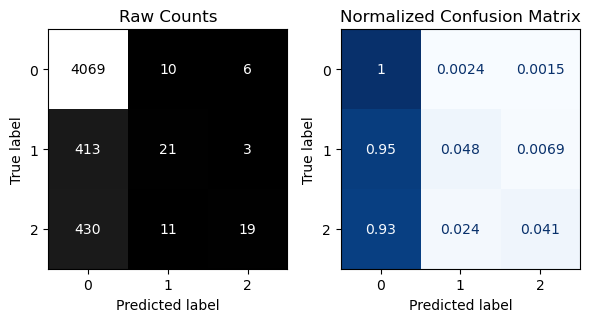


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1367
           1       0.19      0.02      0.04       150
           2       0.20      0.01      0.03       144

    accuracy                           0.82      1661
   macro avg       0.40      0.34      0.32      1661
weighted avg       0.71      0.82      0.75      1661



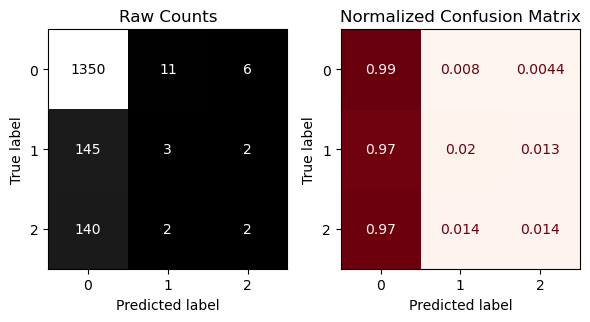

In [52]:
# Obtain evaluation metrics using custom function
evaluate_classification(pca_pipe, X_train, y_train, X_test, y_test)

In [53]:
%%time
# Record the time it takes to make predictions

preds_2 = knn.predict(X_test_pca)



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- DBD100
- DBQ095Z
- DR1.300
- DR1.320Z
- DR1.330Z
- ...
Feature names seen at fit time, yet now missing:
- pca0
- pca1
- pca10
- pca11
- pca12
- ...
